In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib.colors import LogNorm
from dask.distributed import LocalCluster, Client
from glob import glob
from os.path import join

In [10]:
cam_path = "/glade/scratch_old/cchen/archive/TAU_run2/atm/hist"

In [9]:
ls /glade/scratch_old/cchen/archive/TAU_run2/atm/hist

TAU_run2.cam.h0.0001-01.nc           TAU_run2.cam.h1.0001-12-25-10800.nc
TAU_run2.cam.h0.0001-02.nc           TAU_run2.cam.h1.0001-12-25-64800.nc
TAU_run2.cam.h0.0001-03.nc           TAU_run2.cam.h1.0001-12-26-32400.nc
TAU_run2.cam.h0.0001-04.nc           TAU_run2.cam.h1.0001-12-27-00000.nc
TAU_run2.cam.h0.0001-05.nc           TAU_run2.cam.h1.0001-12-27-54000.nc
TAU_run2.cam.h0.0001-06.nc           TAU_run2.cam.h1.0001-12-28-21600.nc
TAU_run2.cam.h0.0001-07.nc           TAU_run2.cam.h1.0001-12-28-75600.nc
TAU_run2.cam.h0.0001-08.nc           TAU_run2.cam.h1.0001-12-29-43200.nc
TAU_run2.cam.h0.0001-09.nc           TAU_run2.cam.h1.0001-12-30-10800.nc
TAU_run2.cam.h0.0001-10.nc           TAU_run2.cam.h1.0001-12-30-64800.nc
TAU_run2.cam.h0.0001-11.nc           TAU_run2.cam.h1.0001-12-31-32400.nc
TAU_run2.cam.h0.0001-12.nc           TAU_run2.cam.h1.0002-01-01-00000.nc
TAU_run2.cam.h0.0002-01.nc           TAU_run2.cam.h1.0002-01-01-54000.nc
TAU_run2.cam.h0.0002-02.nc           TAU_run2.cam.h

In [129]:
ds = xr.open_dataset(join(cam_path, "TAU_run2.cam.h1.0002-01-09-64800.nc"), decode_times=False)

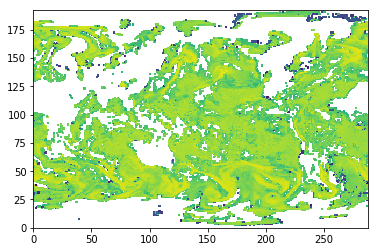

In [130]:
plt.pcolormesh(-ds["qctend_TAU"][0, -5], norm=LogNorm())

In [131]:
noncon = np.abs(ds["qctend_TAU"] + ds["qrtend_TAU"]) > 0

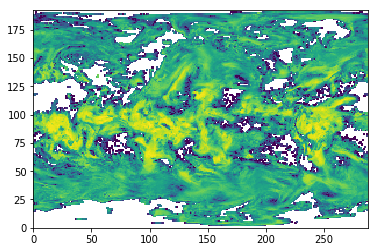

In [132]:
plt.pcolormesh(noncon.sum(axis=0).sum(axis=0), norm=LogNorm())

In [155]:
np.count_nonzero((ds["qrtend_TAU"] > 0) & ~noncon)

7624332

In [169]:
np.count_nonzero(ds["QC_TAU_in"] != 0 )

12928994

In [172]:
ds["QR_TAU_in"].max(axis=0).max(axis=-1).max(axis=-1)

<xarray.DataArray 'QR_TAU_in' (lev: 32)>
array([6.079204e-23, 3.501366e-24, 1.861112e-25, 9.975873e-27, 6.062168e-28,
       4.023744e-29, 1.567608e-30, 1.763117e-26, 2.716846e-21, 1.422484e-17,
       4.317579e-15, 2.997929e-13, 1.433795e-11, 7.574100e-10, 3.166672e-08,
       1.466431e-06, 8.010839e-06, 3.960482e-05, 1.269367e-04, 1.908137e-04,
       3.117224e-04, 1.438738e-03, 1.212054e-03, 1.488096e-03, 1.849610e-03,
       2.760203e-03, 2.702715e-03, 3.014891e-03, 2.779673e-03, 2.887990e-03,
       2.183282e-03, 4.815740e-03], dtype=float32)
Coordinates:
  * lev      (lev) float64 3.643 7.595 14.36 24.61 35.92 43.19 51.68 61.52 ...

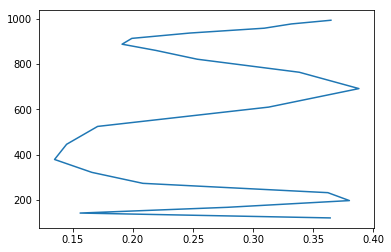

In [146]:
pos_con_lev = noncon.sum(axis=0).sum(axis=-1).sum(axis=-1)
pos_qct_lev = (ds["qrtend_TAU"] > 0).sum(axis=0).sum(axis=-1).sum(axis=-1)
plt.plot(pos_con_lev / pos_qct_lev, ds["lev"])

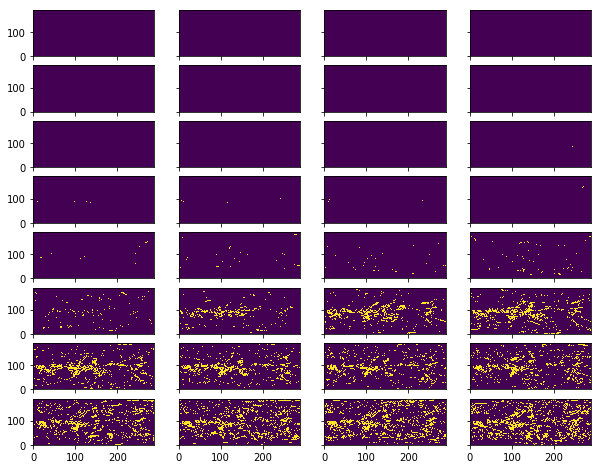

In [133]:
fig, axes = plt.subplots(8, 4, figsize=(10, 8), sharex=True, sharey=True)
for a, ax in enumerate(axes.ravel()):
    ax.pcolormesh(noncon[0,a])

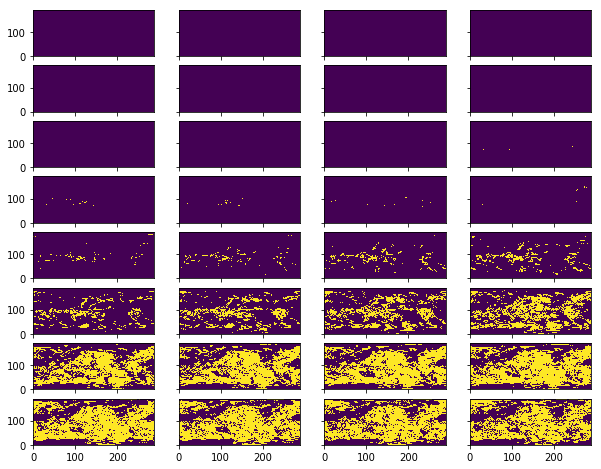

In [134]:
fig, axes = plt.subplots(8, 4, figsize=(10, 8),sharex=True, sharey=True)
noncon_t = noncon.sum(axis=0)
for a, ax in enumerate(axes.ravel()):
    ax.pcolormesh(ds["qrtend_TAU"][0, a] > 0)

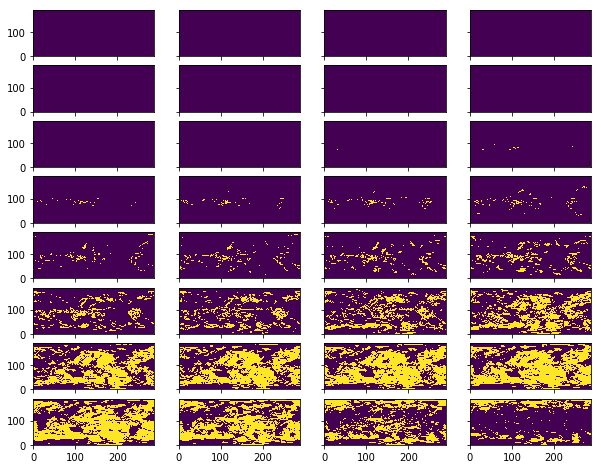

In [135]:
fig, axes = plt.subplots(8, 4, figsize=(10, 8),sharex=True, sharey=True)
noncon_t = noncon.sum(axis=0)
for a, ax in enumerate(axes.ravel()):
    ax.pcolormesh(ds["qrtend_MG2"][0, a] > 0)

In [55]:
tend_diff = np.abs(ds["qctend_TAU"] + ds["qrtend_TAU"])

In [57]:
tend_count = (tend_diff > 0).sum(axis=-1).sum(axis=-1)

Text(0,0.5,'Level (hPa)')

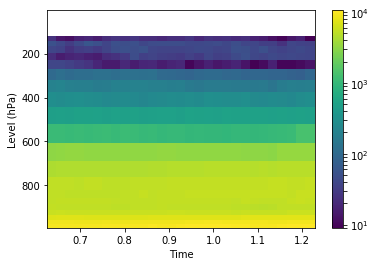

In [93]:
plt.pcolormesh(tend_diff["time"], tend_diff["lev"], np.ma.array(tend_count.T, mask=tend_count.T == 0), norm=LogNorm())
plt.colorbar()
plt.gca().invert_yaxis()
plt.xlabel("Time")
plt.ylabel("Level (hPa)")

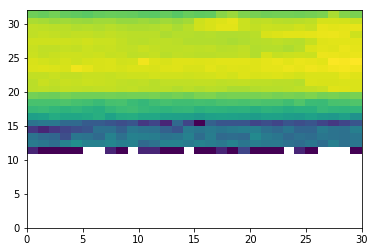

In [97]:
plt.pcolormesh((ds["qctend_TAU"] > 0).sum(axis=-1).sum(axis=-1).T, norm=LogNorm())

In [74]:
np.count_nonzero((tend_diff > 0) & (ds["qctend_TAU"] > 0))

187187

In [76]:
np.count_nonzero((tend_diff > 0) & (ds["qctend_TAU"] < 0))

209510

In [81]:
np.count_nonzero((tend_diff > 0) & (ds["QC_TAU_in"] > 0))

1115234

In [91]:
np.count_nonzero((tend_diff > 0) & (ds["QC_TAU_in"] == 0))

1154544

In [88]:
ds["QC_TAU_in"].max()

<xarray.DataArray 'QC_TAU_in' ()>
array(0.001174)

In [92]:
ds["QC_TAU_in"] > 0

<xarray.DataArray 'QC_TAU_in' (time: 30, lev: 32, lat: 192, lon: 288)>
array([[[[ True, ...,  True],
         ...,
         [False, ..., False]],

        ...,

        [[False, ..., False],
         ...,
         [ True, ...,  True]]],


       ...,


       [[[ True, ...,  True],
         ...,
         [False, ..., False]],

        ...,

        [[ True, ..., False],
         ...,
         [False, ..., False]]]])
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 -84.35 ...
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 11.25 ...
  * lev      (lev) float64 3.643 7.595 14.36 24.61 35.92 43.19 51.68 61.52 ...
  * time     (time) float64 0.625 0.6458 0.6667 0.6875 0.7083 0.7292 0.75 ...

In [128]:
ds.close()